In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from skbio import DistanceMatrix

from evident import AlphaDiversityHandler, BetaDiversityHandler

In [2]:
%%bash

cd /home/grahman/projects/evident
git log -n 1

commit f1a0fd65100e09f46c3e20c1e343d32f6e3e5943
Merge: 97f5474 624bc20
Author: Gibs <grahman@eng.ucsd.edu>
Date:   Sat Feb 12 11:21:19 2022 -0800

    Merge pull request #3 from gibsramen/vector-args
    
    Adds option to pass vectors as arguments instead of single values for power analysis


In [3]:
plot_dict = {
    "figure.facecolor": "white",
    "figure.dpi": 300,
    "axes.spines.top": False,
    "axes.spines.right": False
}

In [4]:
datapath = "/home/grahman/projects/evident/tests/data"
metadata = pd.read_table(f"{datapath}/metadata.tsv", sep="\t", index_col=0)
faith_pd = metadata["faith_pd"]
dm = DistanceMatrix.read(f"{datapath}/distance_matrix.lsmat.gz")
metadata.head()

,bmi,body_habitat,body_product,body_site,calprotectin,cd_behavior,cd_location,cd_resection,collection_timestamp,description,...,sample_type,scientific_name,sex,study,study_id,timepoint,uc_extent,year_diagnosed,faith_pd,classification
1629.SubjectIBD001,25,UBERON:feces,UBERON:feces,UBERON:feces,63.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,06/17/2010,SubjectIBD001,...,stool,human gut metagenome,male,IBD,1629,2,not applicable,1988,9.798095,B1
1629.SubjectIBD002,25,UBERON:feces,UBERON:feces,UBERON:feces,212.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,09/16/2010,SubjectIBD002,...,stool,human gut metagenome,male,IBD,1629,3,not applicable,1988,12.967986,B1
1629.SubjectIBD003,25,UBERON:feces,UBERON:feces,UBERON:feces,258.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,01/04/2011,SubjectIBD003,...,stool,human gut metagenome,male,IBD,1629,4,not applicable,1988,18.984788,B1
1629.SubjectIBD004,25,UBERON:feces,UBERON:feces,UBERON:feces,499.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,04/07/2011,SubjectIBD004,...,stool,human gut metagenome,male,IBD,1629,5,not applicable,1988,12.328921,B1
1629.SubjectIBD005,25,UBERON:feces,UBERON:feces,UBERON:feces,104.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,06/28/2011,SubjectIBD005,...,stool,human gut metagenome,male,IBD,1629,6,not applicable,1988,11.603600,B1


In [5]:
metadata["classification"].value_counts()

Non-B1    121
B1         99
Name: classification, dtype: int64

In [6]:
metadata["cd_behavior"].value_counts()

Non-stricturing, non-penetrating (B1)    99
Stricturing (B2)                         91
Penetrating (B3)                         30
Name: cd_behavior, dtype: int64

In [7]:
%%time

adh = AlphaDiversityHandler(faith_pd, metadata)

alpha = 0.05
differences = [2, 3, 4]
total_observations = range(20, 310, 10)

alpha_power_res = adh.power_analysis(
    column="classification",
    total_observations=total_observations,
    difference=differences,
    alpha=alpha
)
alpha_records = [
    (x.alpha, x.total_observations, x.power, x.effect_size)
    for x in alpha_power_res
]
alpha_df = pd.DataFrame.from_records(
    alpha_records,
    columns=["alpha", "total_observations", "power", "effect_size"]
)
alpha_df["effect_size"] = alpha_df["effect_size"].round(2)
alpha_df.head()

CPU times: user 29.2 ms, sys: 1.76 ms, total: 31 ms
Wall time: 30.6 ms


,alpha,total_observations,power,effect_size
0,0.05,20,0.209135,0.54
1,0.05,30,0.299351,0.54
2,0.05,40,0.385918,0.54
3,0.05,50,0.466889,0.54
4,0.05,60,0.541082,0.54


In [8]:
print(*alpha_power_res[:5], sep="\n")

PowerAnalysisResults(alpha=0.05, total_observations=20, power=0.20913541892502044, effect_size=0.5416648334068577)
PowerAnalysisResults(alpha=0.05, total_observations=30, power=0.2993505979728453, effect_size=0.5416648334068577)
PowerAnalysisResults(alpha=0.05, total_observations=40, power=0.38591838587833793, effect_size=0.5416648334068577)
PowerAnalysisResults(alpha=0.05, total_observations=50, power=0.46688860431901136, effect_size=0.5416648334068577)
PowerAnalysisResults(alpha=0.05, total_observations=60, power=0.5410821485842225, effect_size=0.5416648334068577)


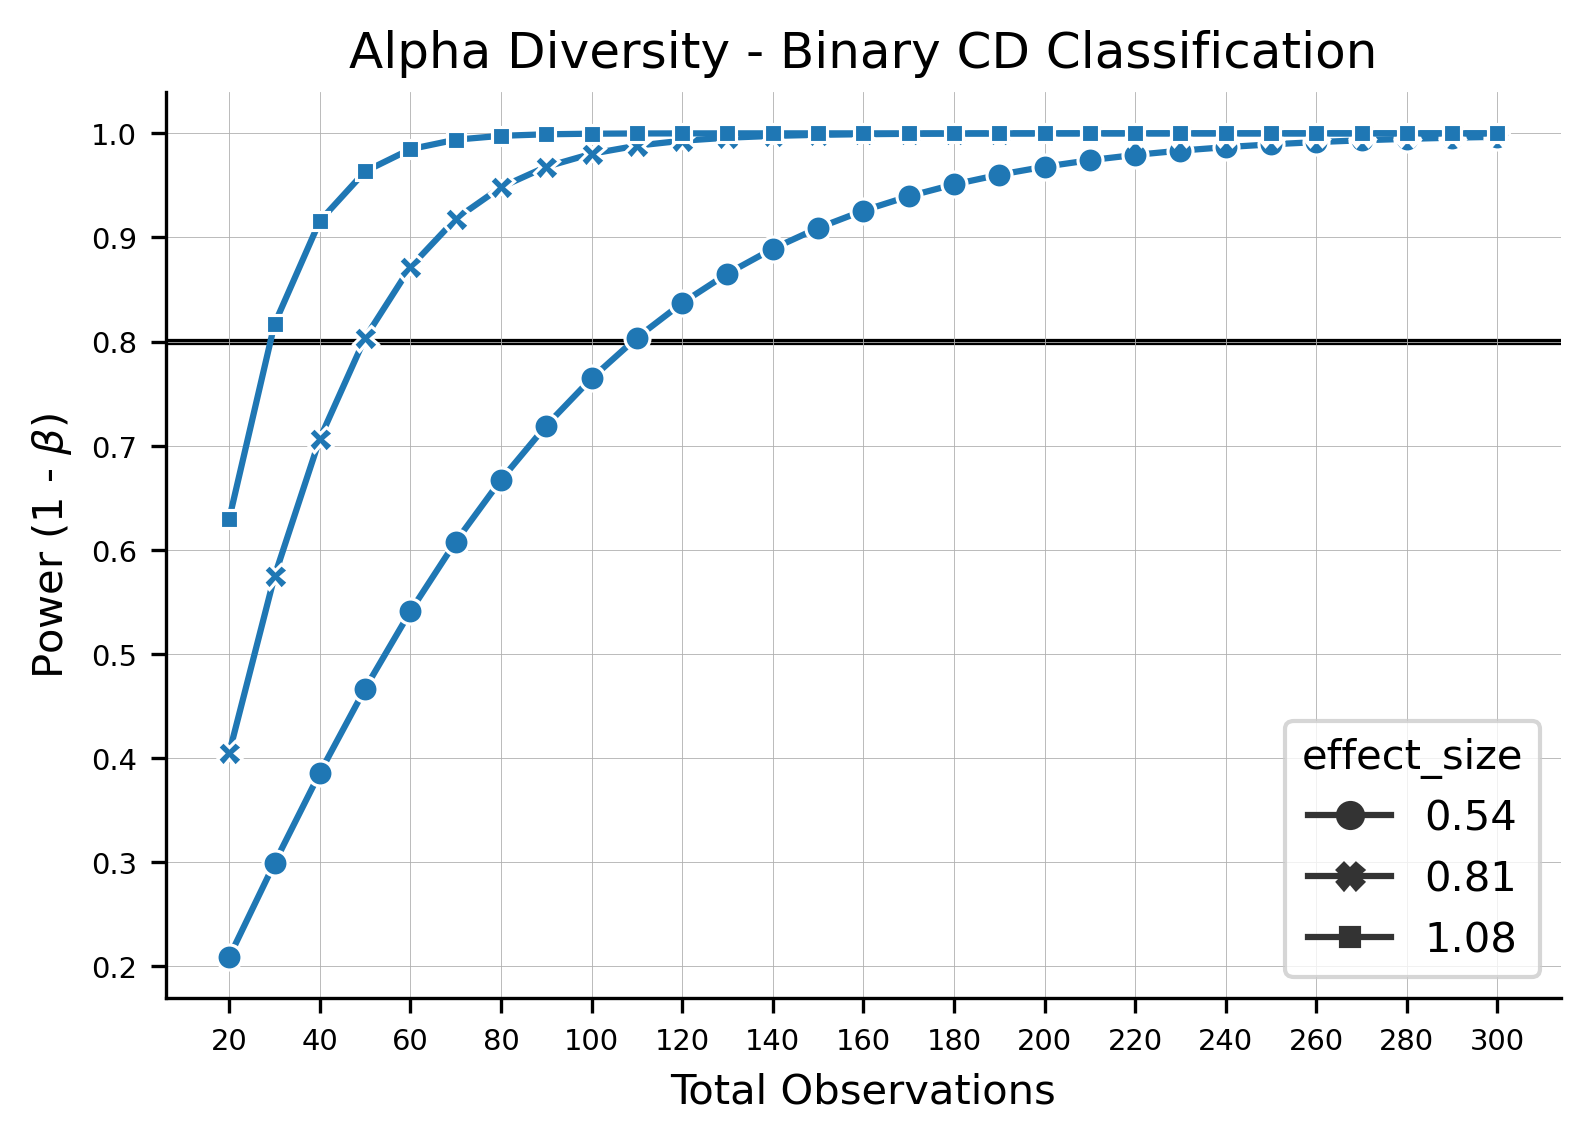

In [9]:
with mpl.rc_context(plot_dict):
    fig, ax = plt.subplots(1, 1)

    sns.lineplot(
        data=alpha_df,
        x="total_observations",
        y="power",
        style="effect_size",
        markers=True,
        dashes=False,
        ax=ax
    )
    ax.grid(linewidth=0.2)
    ax.axhline(y=0.8, color="black", zorder=0)
    ax.set_xlabel("Total Observations")
    ax.set_ylabel(r"Power (1 - $\beta$)")
    ax.set_xticks(np.arange(20, 320, 20))
    ax.tick_params("both", labelsize="x-small")
    ax.set_title("Alpha Diversity - Binary CD Classification")

plt.show()

In [10]:
%%time

bdh = BetaDiversityHandler(dm, metadata)

alpha_vals = [.001, .01, .05, .1]
obs_vals = range(20, 310, 10)

beta_power_res = bdh.power_analysis(
    column="classification",
    total_observations=obs_vals,
    alpha=alpha_vals
)
beta_records = [
    (x.alpha, x.total_observations, x.power, x.effect_size)
    for x in beta_power_res
]
beta_df = pd.DataFrame.from_records(
    beta_records,
    columns=["alpha", "total_observations", "power", "effect_size"]
)
beta_df.head()

CPU times: user 33.7 ms, sys: 1.14 ms, total: 34.8 ms
Wall time: 34.2 ms


,alpha,total_observations,power,effect_size
0,0.001,20,0.013311,0.557381
1,0.010,20,0.075016,0.557381
2,0.050,20,0.218697,0.557381
3,0.100,20,0.330250,0.557381
4,0.001,30,0.028383,0.557381


In [11]:
print(*beta_power_res[:5], sep="\n")

PowerAnalysisResults(alpha=0.001, total_observations=20, power=0.013310836279929367, effect_size=0.5573813594436355)
PowerAnalysisResults(alpha=0.01, total_observations=20, power=0.07501642386778419, effect_size=0.5573813594436355)
PowerAnalysisResults(alpha=0.05, total_observations=20, power=0.21869690703892986, effect_size=0.5573813594436355)
PowerAnalysisResults(alpha=0.1, total_observations=20, power=0.3302495862081334, effect_size=0.5573813594436355)
PowerAnalysisResults(alpha=0.001, total_observations=30, power=0.02838308759965423, effect_size=0.5573813594436355)


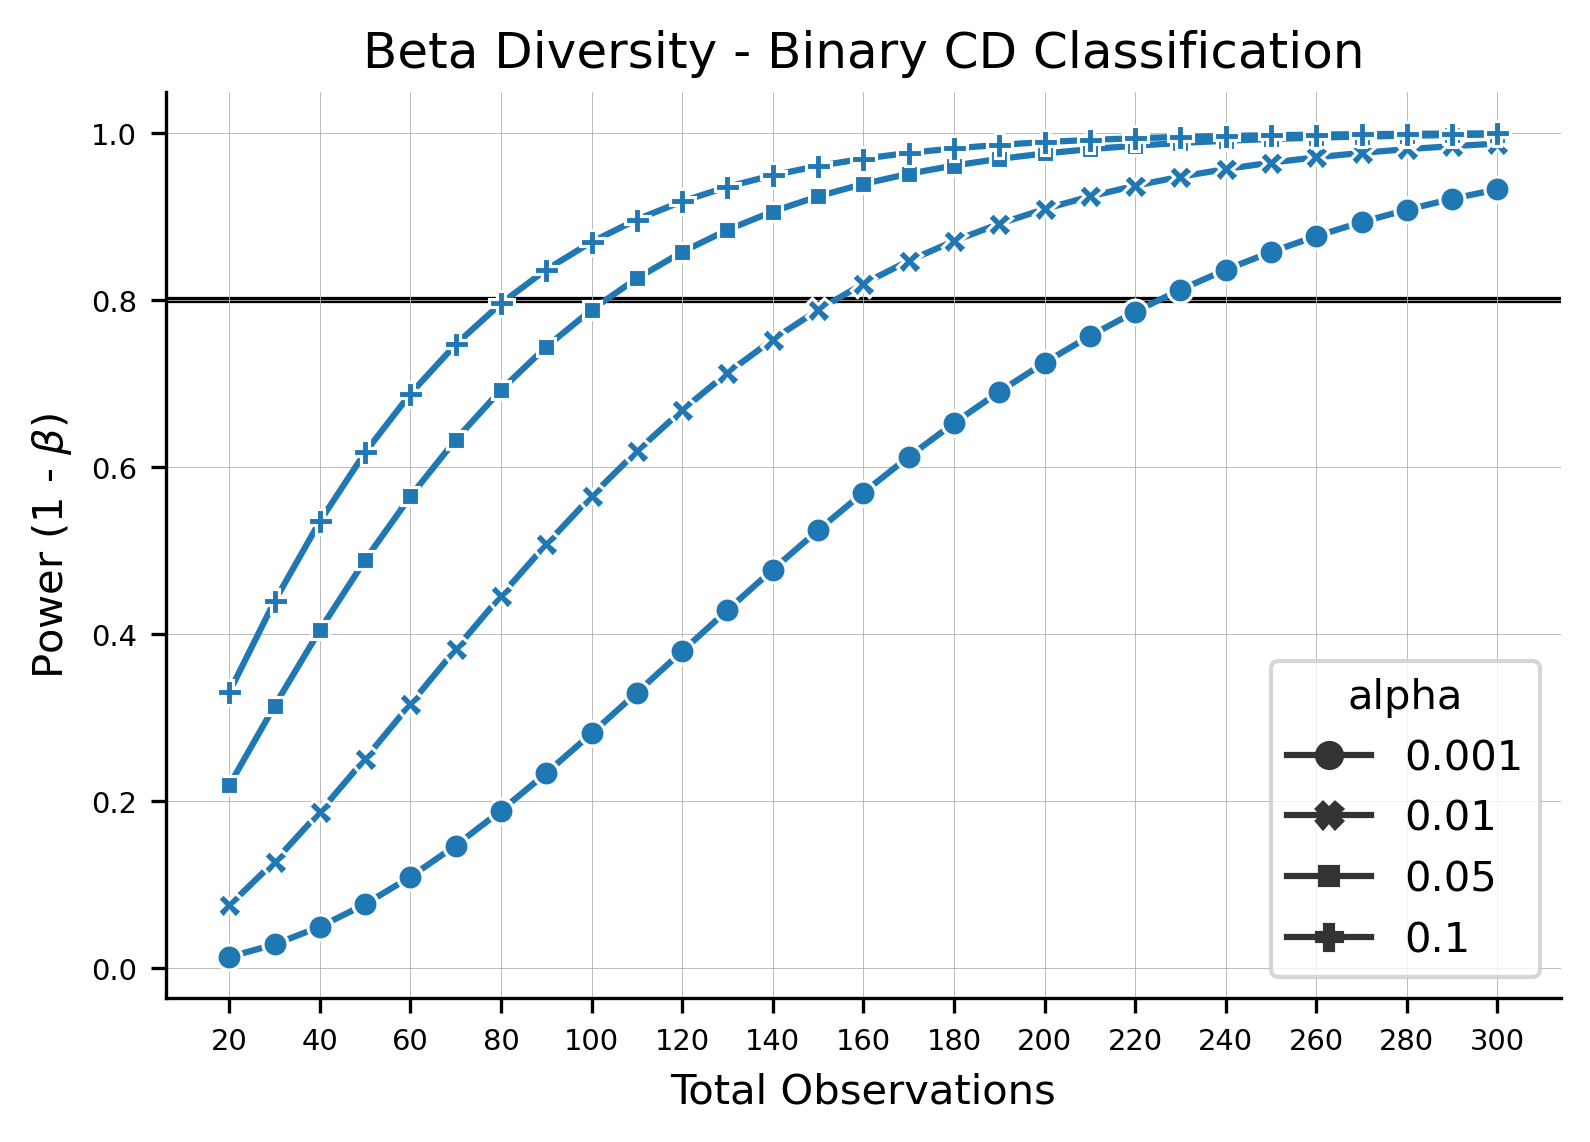

In [12]:
with mpl.rc_context(plot_dict):
    fig, ax = plt.subplots(1, 1)

    sns.lineplot(
        data=beta_df,
        x="total_observations",
        y="power",
        style="alpha",
        markers=True,
        dashes=False,
        ax=ax
    )
    ax.grid(linewidth=0.2)
    ax.axhline(y=0.8, color="black", zorder=0)
    ax.set_xlabel("Total Observations")
    ax.set_ylabel(r"Power (1 - $\beta$)")
    ax.set_xticks(np.arange(20, 320, 20))
    ax.tick_params("both", labelsize="x-small")
    ax.set_title("Beta Diversity - Binary CD Classification")

plt.show()

In [13]:
%%time

alpha_vals = [.001, .01, .05, .1]
obs_vals = range(20, 310, 10)

beta_ternary_power_res = bdh.power_analysis(
    column="cd_behavior",
    total_observations=obs_vals,
    alpha=alpha_vals
)
beta_ternary_records = [
    (x.alpha, x.total_observations, x.power, x.effect_size)
    for x in beta_ternary_power_res
]
beta_ternary_df = pd.DataFrame.from_records(
    beta_ternary_records,
    columns=["alpha", "total_observations", "power", "effect_size"]
)
beta_ternary_df.head()

CPU times: user 34.9 ms, sys: 937 µs, total: 35.8 ms
Wall time: 34.8 ms


,alpha,total_observations,power,effect_size
0,0.001,20,0.005419,0.245799
1,0.010,20,0.037753,0.245799
2,0.050,20,0.134158,0.245799
3,0.100,20,0.224418,0.245799
4,0.001,30,0.010868,0.245799


In [14]:
print(*beta_ternary_power_res[:5], sep="\n")

PowerAnalysisResults(alpha=0.001, total_observations=20, power=0.005418861895396976, effect_size=0.24579939873031253)
PowerAnalysisResults(alpha=0.01, total_observations=20, power=0.037752599893722705, effect_size=0.24579939873031253)
PowerAnalysisResults(alpha=0.05, total_observations=20, power=0.13415786312451328, effect_size=0.24579939873031253)
PowerAnalysisResults(alpha=0.1, total_observations=20, power=0.2244175900660197, effect_size=0.24579939873031253)
PowerAnalysisResults(alpha=0.001, total_observations=30, power=0.010868016845439255, effect_size=0.24579939873031253)


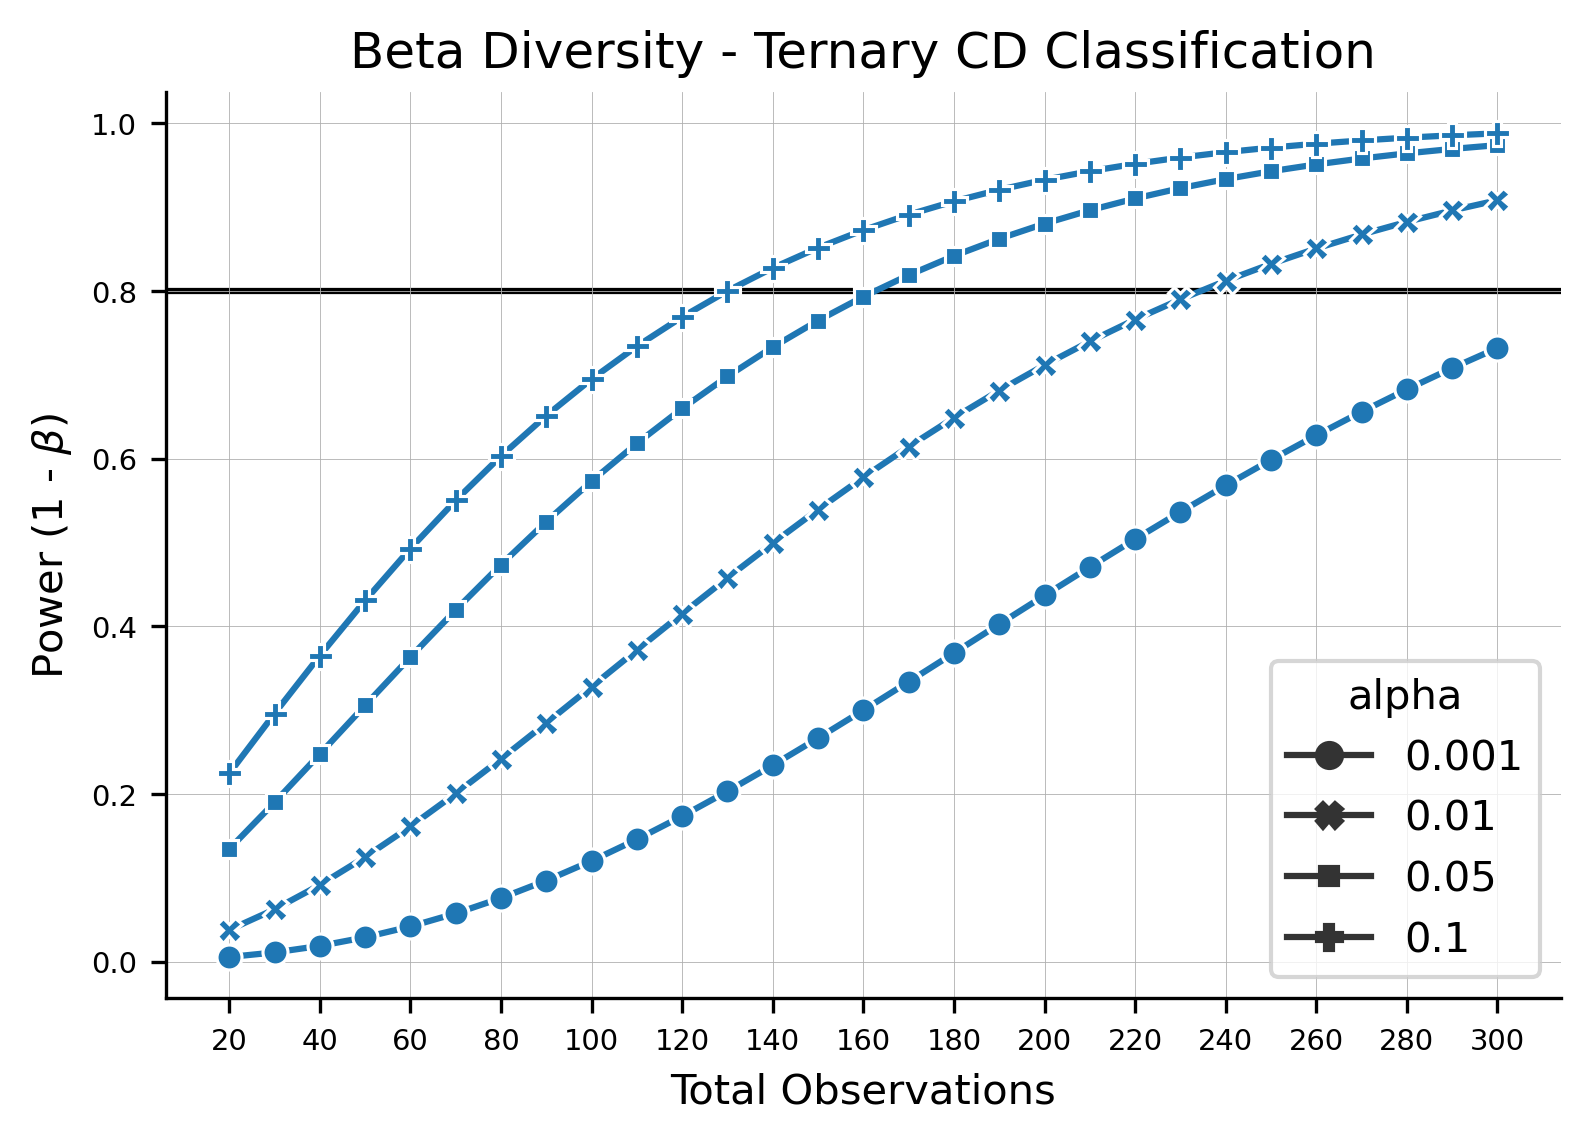

In [15]:
with mpl.rc_context(plot_dict):
    fig, ax = plt.subplots(1, 1)

    sns.lineplot(
        data=beta_ternary_df,
        x="total_observations",
        y="power",
        style="alpha",
        markers=True,
        dashes=False,
        ax=ax
    )
    ax.grid(linewidth=0.2)
    ax.axhline(y=0.8, color="black", zorder=0)
    ax.set_xlabel("Total Observations")
    ax.set_ylabel(r"Power (1 - $\beta$)")
    ax.set_xticks(np.arange(20, 320, 20))
    ax.tick_params("both", labelsize="x-small")
    ax.set_title("Beta Diversity - Ternary CD Classification")

plt.show()